## Import Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob

## Load Dataset

In [4]:
df = pd.read_excel('data/Merchandise Sales Dataset.xlsx', sheet_name='Data')

In [5]:
df.head()

,Order ID,Order Date,Product ID,Product Category,Buyer Gender,Buyer Age,Order Location,Latitude,Longitude,International Shipping,Sales Price,Shipping Charges,Sales per Unit,Quantity,Total Sales,Rating,Review
0,189440,2024-07-21,BF1543,Clothing,Male,30,New Jersey,39.833851,-74.871826,No,100,0,100,1,100,4,The delivery team handled the product with care.
1,187385,2024-07-20,BF1543,Clothing,Male,32,Las Vegas,36.188110,-115.176468,No,100,0,100,1,100,3,Had slight delays but the product was in good ...
2,181844,2024-07-21,BF1544,Other,Female,26,Cardiff,51.481583,-3.179090,Yes,9,40,49,1,49,2,Waste of Money.
3,197934,2024-08-19,BF1544,Other,Male,28,Pittsburgh,40.440620,-79.995890,No,9,0,9,2,18,3,Had slight delays but the product was in good ...
4,122470,2024-01-06,BF1545,Other,Female,19,Miami,25.761681,-80.191788,No,10,0,10,3,30,5,Lack of delivery delays is greatly appreciated.


## Data Cleaning

In [6]:
missing_data = {
  "Null values": df.isnull().sum().sum(),
  "Duplicated values": df.duplicated().sum()
}

for key, values in missing_data.items():
  print(f"{key}: {values}")

if df.duplicated().sum():
  df = df.drop_duplicates()
  print("Duplicates removed successfully.")

Null values: 0
Duplicated values: 0


## Answers

1. What are the overall sales trends?

2. Which product categories perform the best?

In [7]:
categories_perform = df.groupby('Product Category')['Total Sales'].sum().reset_index(name='Sales')
categories_perform = categories_perform.sort_values(by='Sales', ascending=False)

display(categories_perform)

,Product Category,Sales
0,Clothing,637201
1,Ornaments,155804
2,Other,63457


3. What are the most and least popular products?

In [8]:
popular_products = df.groupby('Product ID')['Quantity'].sum().reset_index(name='Total Quantity')
popular_products = popular_products.sort_values(by='Total Quantity', ascending=False).head(5)

unpopular_products = df.groupby('Product ID')['Quantity'].sum().reset_index(name='Total Quantity')
unpopular_products = unpopular_products.sort_values(by='Total Quantity', ascending=True).head(5)

print("="*40)
print(" Most Popular Products ")
print("="*40)
display(popular_products)
print("\n")

print("="*40)
print(" Most Popular Products ")
print("="*40)
display(unpopular_products)


 Most Popular Products 


,Product ID,Total Quantity
5,BF1548,2421
8,BF1551,1586
7,BF1550,1273
0,BF1543,1220
1,BF1544,1219




 Most Popular Products 


,Product ID,Total Quantity
12,BF1555,227
10,BF1553,362
9,BF1552,503
3,BF1546,555
4,BF1547,562


4. How does location affect sales performance?

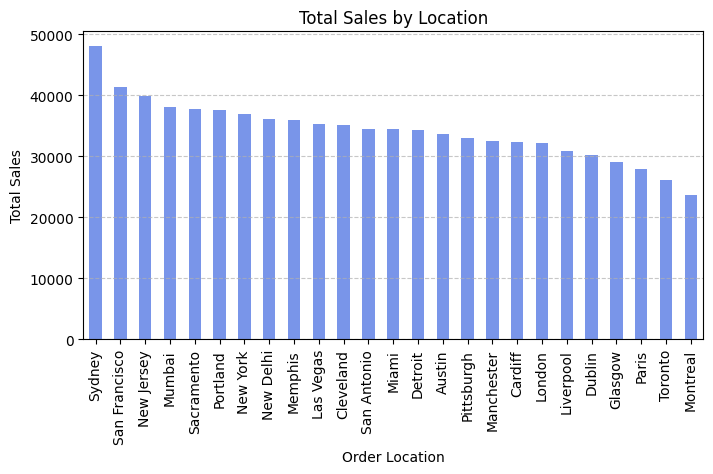

In [9]:
sales_location = df.groupby('Order Location')['Total Sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(8, 4))
sales_location.plot(kind='bar', color='royalblue', alpha=0.7)
plt.title("Total Sales by Location")
plt.xlabel("Order Location")
plt.ylabel("Total Sales")
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

5. What impact does international shipping have on sales?

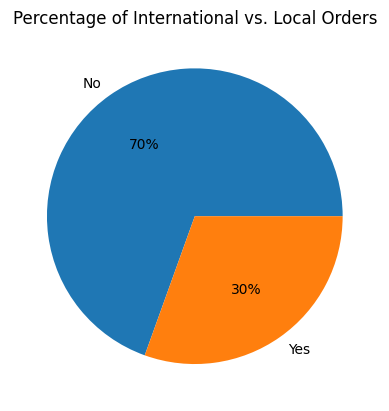

In [10]:
international_shipping = df.groupby('International Shipping')['Order ID'].count().reset_index(name='Count')

plt.pie(international_shipping['Count'], labels=international_shipping['International Shipping'], autopct='%.0f%%')

plt.title("Percentage of International vs. Local Orders")
plt.show()

6. What is the demographic profile of buyers?

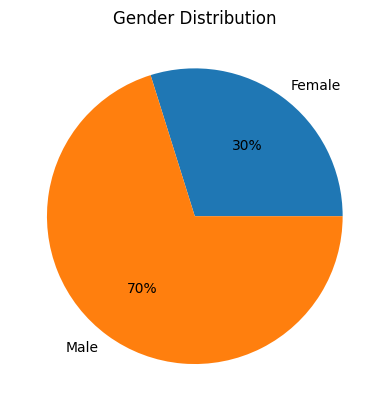

In [11]:
gender_distribution = df.groupby('Buyer Gender')['Order ID'].count().reset_index(name='Count')

plt.pie(gender_distribution['Count'], labels=gender_distribution['Buyer Gender'], autopct='%.0f%%')
plt.title("Gender Distribution")
plt.show()

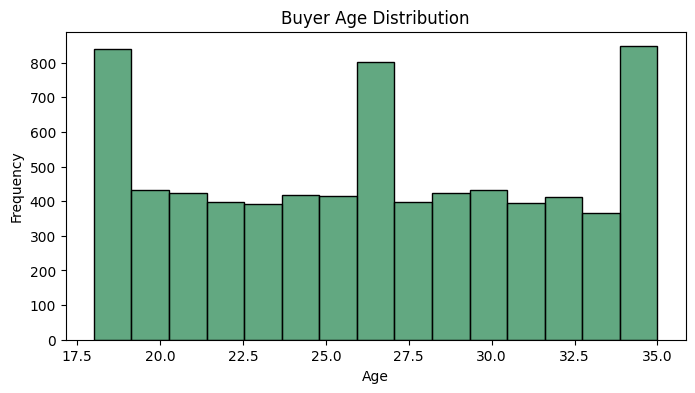

In [12]:
plt.figure(figsize=(8, 4))
sns.histplot(df['Buyer Age'], bins=15, color='seagreen')
plt.title("Buyer Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

7. How do ratings and reviews correlate with sales?

In [34]:
df['Sentiment Score'] = df['Review'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

df_unique_reviews = df[['Order ID', 'Review', 'Sentiment Score']].drop_duplicates(subset=['Review'])

#df_unique_reviews.to_csv('data/reviews_sentiment_unique.csv', index=False)


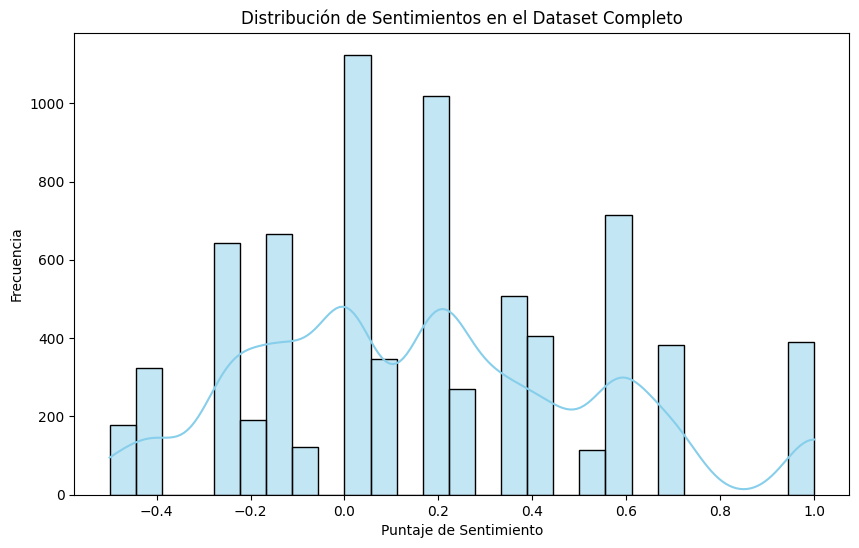

In [36]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Sentiment Score'], kde=True, color='skyblue')
plt.title("Distribución de Sentimientos en el Dataset Completo")
plt.xlabel("Puntaje de Sentimiento")
plt.ylabel("Frecuencia")
plt.show()


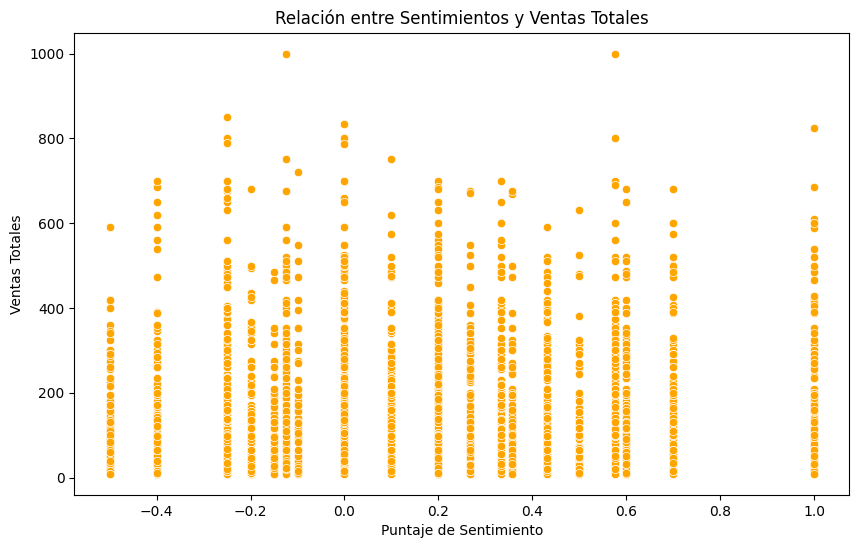

In [37]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Sentiment Score', y='Total Sales', data=df, color='orange')
plt.title("Relación entre Sentimientos y Ventas Totales")
plt.xlabel("Puntaje de Sentimiento")
plt.ylabel("Ventas Totales")
plt.show()

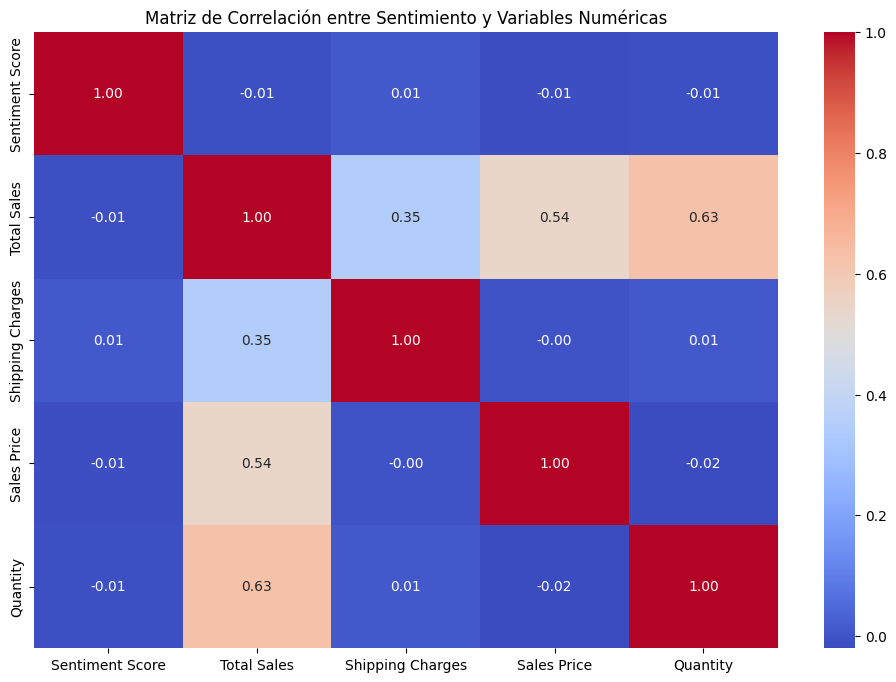

In [38]:
correlation_matrix = df[['Sentiment Score', 'Total Sales', 'Shipping Charges', 'Sales Price', 'Quantity']].corr()

# Mapa de calor de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlación entre Sentimiento y Variables Numéricas")
plt.show()

8. What are the trends in shipping charges?

<Axes: xlabel='Order Date'>

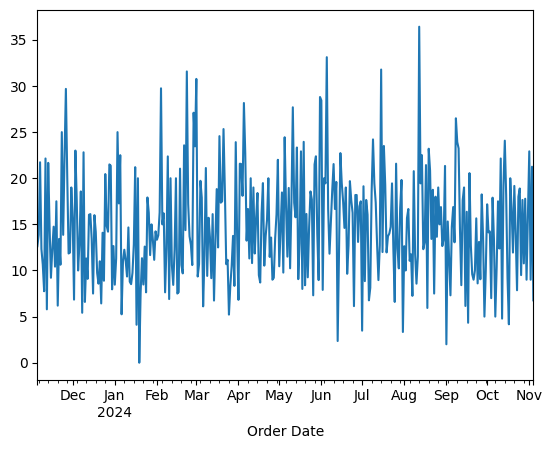

In [14]:
df.groupby('Order Date')['Shipping Charges'].mean().plot()

9. How do discounts or promotional pricing influence purchasing behavior?

In [15]:
df['Discount Applied'] = df['Sales Price'] < df['Sales per Unit']
df.groupby('Discount Applied')['Total Sales'].mean()


Discount Applied
False     91.380813
True     171.554767
Name: Total Sales, dtype: float64

10. Are there any patterns in repeat purchases?

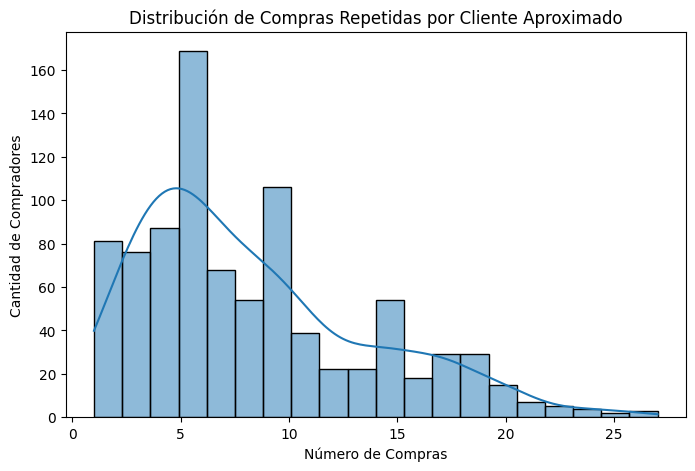

In [16]:
df['Buyer Approx'] = df['Buyer Age'].astype(str) + " - " + df['Buyer Gender'] + " - " + df['Order Location']

repeat_customers = df['Buyer Approx'].value_counts()

plt.figure(figsize=(8, 5))
sns.histplot(repeat_customers, bins=20, kde=True)
plt.title("Distribución de Compras Repetidas por Cliente Aproximado")
plt.xlabel("Número de Compras")
plt.ylabel("Cantidad de Compradores")
plt.show()



In [17]:
df['Is_Repeated_Buyer'] = df['Buyer Approx'].isin(repeat_customers[repeat_customers > 1].index)

df.groupby('Is_Repeated_Buyer')[['Total Sales', 'Quantity']].mean()


,Total Sales,Quantity
Is_Repeated_Buyer,,
False,150.060606,1.666667
True,115.678576,1.668116


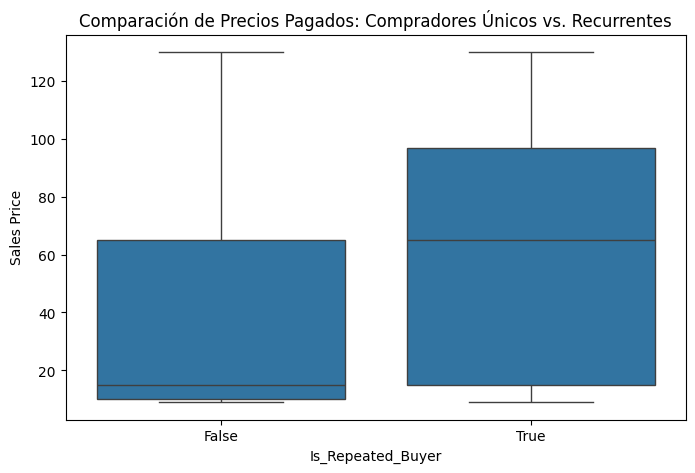

In [18]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Is_Repeated_Buyer'], y=df['Sales Price'])
plt.title("Comparación de Precios Pagados: Compradores Únicos vs. Recurrentes")
plt.show()
